# **CS-473 (Pattern Recognition)**

## Assignment 2 - Bayesian Theorem

##### Nikolaos Kougioulis (csdp1285)

---


### **Part A** 

Data - Part A: the total disease cases in 1996 were approximately 290,000 worldwide, the world population in 1996 was estimated to be $6.8 \cdot 10^9$ people, sensitivity of the test = $0.99$, specificity of the test = $0.96$.

Equation - Part A: 

For Part A, you should use equation 1, where Test positive $(\text{T}^{+})$, Test negative $(\text{T}^{−})$, disease present $(\text{D}^{+} )$, disease absent $(\text{D}^{−})$.

$$\displaystyle P(\text{D}^{+}|\text{T}^{+}) = \frac{P(\text{T}^{+}|\text{D}^{+})P(\text{D}^{+})}{P(\text{T}^{+})}$$

In [ ]:
!python --version

Python 3.9.16


In [ ]:
#import random
import math 
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

### **Question 1:** The model

1. Implement a function that takes as input the sensitivity, the specificity of a test and the prior probability of having a disease and returns the posterior probability of having that disease given that a person was tested positive.

2. Compute the probability of that person actually having the disease given that it tested positive.

3. Save and print the posterior probability of that person having the disease given that another test has been done and it turned to be positive.

4. Compute the probability of that person actually having the disease (use the first posterior you computed),
for each one of the following cases: when the total cases in 1997 were (a) 2 million, (b) 7.5 million, (c) 1 billion.
5. Briefly explain how/why the posterior probability of actually having the disease given that you tested positive, is affected by the prior.

---

#### **Solution**

This exercise is a classic example, present in any probability theory textbook, on how the probability of having a disease given that you tested positive is much lower than the sensitivity of the test, which many people misinterpret as the conditional accuracy of the test (e.g pregnancy tests, PCR tests etc).

Recall that *sensitivity* is the ability of a test to correctly identify patients with a disease (true positives) while *specificity* is the ability of a test to correctly identify people without the disease (true negatives). Hence  $P(\text{T}^{+} | \text{D}^{+}) = 0.99$ and $P(\text{T}^{-} | \text{D}^{-}) = 0.96$.


1. We are asked to compute $\displaystyle P(\text{D}^{+}|\text{T}^{+})$, which  according to Bayes' theorem evaluates to 

 $$\displaystyle P(\text{D}^{+}|\text{T}^{+}) = \frac{P(\text{T}^{+},\text{D}^{+})}{P(\text{T}^{+})} \equiv \frac{P(\text{T}^{+}|\text{D}^{+})P(\text{D}^{+})}{P(\text{T}^{+})}$$

 From the *law of total probability* we directly obtain the prior probability of positive tests  

 $$\displaystyle P(\text{T}^{+}) = \sum_{k=+,-} P(\text{D}^{k})P(\text{T}^{+}|\text{D}^{k}) = P(\text{D}^{+})P(\text{T}^{+}|\text{D}^{+}) + P(\text{D}^{-})P(\text{T}^{+} | \text{D}^{-})$$

 Because $n =6.8 \cdot 10^9$ with a total of $29 \cdot 10^4$ cases, we obtain $\displaystyle P({D^+}) = \frac{29 \cdot 10^4}{6.8 \cdot 10^9} = 42647 \cdot 10^{-9}$. 
 
 We can now compute the posterior

 $$\displaystyle P(\text{D}^{+}|\text{T}^{+}) = \frac{P(\text{T}^{+}|\text{D}^{+})P(\text{D}^{+})}{P(\text{T}^{+})} = \frac{P(\text{T}^{+}|\text{D}^{+})P(\text{D}^{+})}{P(\text{D}^{+})P(\text{T}^{+}|\text{D}^{+}) + P(\text{D}^{-})P(\text{T}^{+} | \text{D}^{-})}$$

In [ ]:
def prior(positive_cases, population):
  '''
  this function returns the probability P(D+)
  params: number of positive cases
          population number
  '''
  return positive_cases/population

def posterior(sensitivity, specificity, pr):
  '''
  params: sensitivity: sensitity of the test 
  blah
  '''
  nom = sensitivity*pr

  denom = pr*sensitivity + (1-pr)*(1-specificity)

  return nom/denom

2. From the *prior* function with parameters $0.99$, $0.96$ and $6.8 \cdot 10^9$ we directly obtain, rounded to 6 decimal digits:

In [ ]:
print(round(posterior(0.99,0.96, prior(29*10**4,6.8*10**9)), 6))

0.001054


3. Taking into account that $P(\text{D}^+ |\text{T}^+) = 0.001054$ and updating the prior with the new posterior:

In [ ]:
prob = posterior(0.99,0.96, prior(29*10**4,6.8*10**9))

#update the prior with the posterior probability
prob = round(posterior(0.99,0.96, prob), 6)
print(prob)

0.02546


4. Again, from our *prior* function:

In [ ]:
print("Posterior for 2 million positive cases: ", round(posterior(0.99,0.96, prior(2*10**6,6.8*10**9)), 6), "\n")
print("Posterior for 7.5 million positive cases: ", round(posterior(0.99,0.96, prior(7.5*10**6,6.8*10**9)), 6), "\n")
print("Posterior for 1 billion positive cases: ", round(posterior(0.99,0.96, prior(10**9,6.8*10**9)), 6), "\n")

Posterior for 2 million positive cases:  0.007229 

Posterior for 7.5 million positive cases:  0.026601 

Posterior for 1 billion positive cases:  0.810147 



5. Initially, the prior probability of having a disease serves as the initial estimate before we perform a test. As mentioned previously, a high sensitivity or recall does not necessarily reflect a high posterior probability of having the disease. Relatively speaking, if the prior of having the disease is high, then the posterior of having the disease given a positive test will be high too and the opposite. Notice how if we keep obtaining positive tests, then the posterior probability $P(\text{T}^{+} | \text{D}^{+})$ will get close to 1 (e.g its highly unlikely to obtain 5 positive pregnancy tests in a row and not be pregnant).


### **Part B**

In a classroom, there are 23 children. The teacher decides to find out about their birthday. Notice that the teacher cares only about the day and the month of their birthday (365 days in total), not the year. Each child’s birthday
is equally likely to be any of the 365 days, independently.

### **Question 1:**

1. Compute the probability of 2 children having different birthdays.

2. Compute the number of all the possible combinations for a pair of 2 children in that class. In other words, how many comparisons (combinations) should be made to compare 23 birthdays against each other?

3. Implement a function to compute the probability of all children having different birthdays. The function should have as input the total number (m) of children in the class (m = 23 in our case) and return the probability. Again each child is equally likely to be born on any of the 365 days regardless of the birthdays of the others.

4. How many children should there be in the class to be mathematically certain that there are at least 2 children with the same birthday. Explain your answer shortly.

#### **Solution**

1. For 2 children to have different birthdays, let the first child have birthday on day $x$ and the second child on day $y$. Then $y \neq x$ must hold, hence $\displaystyle p = \frac{365}{365} \times \frac{364}{365} = \frac{364}{365}$ 

2. For 23 number of children, there are a total of $\binom{n}{2}$ possible birthday pairs, where $n$ is the total number of children. Hence for 23 children, $$\binom{23}{2} = \frac{23!}{21! \cdot 2!} = \frac{21! \cdot 22 \cdot 23}{21! \cdot 2} = 253 ~\text{pairs}$$ The function *num_of_pairs* computes exactly that:

In [ ]:
def num_of_pairs(n):
  '''
  this function computes the number of pairs 
  for a total of n items using Newton's binomial coeff.
  params: number n
  output: number of pairs
  '''
  return int(math.factorial(n)/(math.factorial(n-2)*2))

print(num_of_pairs(23))

253


3. Let $n$ be the number of people. 

  It is easier to find the probability that no pair out of $n$ people share the same birthday. 

  Assume all birthdays are equally likely. If the first person is born on day $x_1$, then the second person cannot be born on day $x_1$. The probability of this happening is $364/365$. Let the birthday of the second person be $x_2$. The probabilty that the third person is not born on $x_1$ or $x_2$ is $363/365$. So for $n$ people, the probability that no pair shares a birthday is 

  $\displaystyle \frac{364}{365} \cdot \frac{363}{365} \cdot \ldots \cdot \frac{365-(n-1)}{365}$

  Hence the probability that at least one pair shares a birthday, in a group of $n$ children, is 

  $p(n) =\displaystyle 1 - \frac{364}{365} \cdot \frac{363}{365} \cdot \ldots \cdot \frac{365-(n-1)}{365}$

In [ ]:
def share_a_birthday(n):
  '''
  this function computes the probability of
  at least one pair sharing a birthday in a
  group of n people
  params: number n
  output: probability of at least one pair
  sharing a birthday
  '''
  p = 1
  for k in range(1,n):
    p = p*(365-k)/365 
  return 1- p

print("Probability that at least one pair shares a birthday for n=2:", round(share_a_birthday(2),5))
print("Probability that at least one pair shares a birthday for n=23:", round(share_a_birthday(23),2))

Probability that at least one pair shares a birthday for n=2: 0.00274
Probability that at least one pair shares a birthday for n=23: 0.51


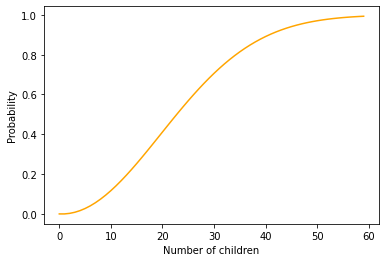

In [ ]:
birthdays = []
for i in range(0,60):
    birthdays.append(share_a_birthday(i))

plt.plot(birthdays, color="orange")
plt.xlabel("Number of children")
plt.ylabel("Probability")
plt.show()

4. To be completely certain ($p=1$) that at least one pair will share the same birthday, by the pigeonhole principle, we need $n \geq 365$.

One however may choose a certain $\epsilon > 0$ as a confidence value to compute an $n$ such that $|1-p(n)| \leq \epsilon$. For example, if we choose $\epsilon = 10^{-6}$: 

In [ ]:
epsilon = 0.000001
num = 1
prob = 1

while abs(1-share_a_birthday(num)) > epsilon:
  num +=1
  prob = share_a_birthday(num)

print(num)

97


hence for a class of $97$ children there is a one in a million chance that all children have distinct birthays (out of all classes on earth does there even exist such a rare class?)

### **Question 2: Bayesian update**


The teacher now challenged the children to find her birthday. Each one of the children would get up from their desk, go to the teacher, silently tell her its guess (without the other children listening) and then sit back down to its desk. The teacher would only write on the board whether the guess of the child ’landed’ left or right from her birthday.

1. A year has 365 days
2. Initially, the birthday of the teacher are equally likely to be any day of the year.
3. A guess (e.g. 12 of March) is said to land left if the day is earlier than the teacher birthday, and right otherwise.
In total, there were 23 guesses
4. On the board was written the following:
$$\displaystyle \text{LLLRLRRLRRRLLLRLLRRRLLL}$$

You are asked to:

1. Implement a function to compute the probability of the teacher’s birthday to be on a day x, given the observations $\left\{L, N\right\}, P(x|L, N)$ where $N$ is the total number of observations. Follow the steps bellow:

      (a) Compute the probability of a single guess being left

      (b) Compute the probability of 5 guesses in a row being left.

      (c) Compute the probability of 4 guesses out of 10 being left.

      (d) Having answered all the previous steps you should now be able to complete the initial question 2.1.

2. Plot the probability distribution for the teacher’s birthday after having all the evidence.

3. What’s the most probable date of the year for the teacher’s birthday.
4. (10% Bonus) We would like to visualize how our belief about the teacher’s birthday changes with each new observation. Create an animated plot of 23 frames, one frame per guess, of the probability distribution over the days of the year. This plot should show how the probability distribution changes after each new evidence.


#### **Solution**

1.  Initially, since there is no observations, teacher's birthday follows the discrete uniform distribution with parameters $\alpha=1, ~\beta=365$, $B \sim \mathcal{U}(1,365)$. Hence the probability function of the prior distribution is $P(\text{B}=b) = 1/365$ for all $b=1,2,\ldots,365$ (plotted as a line instead of a bar for illustrative purposes). We can obtain the posterior probabilities given observations of size $N$ as follows:

 After an observation is left, $$P(B=b|\text{L}) = \frac{P(\text{L}|\text{B}=b)P(\text{B}=b)}{P(\text{L})}$$

 Similarly, after an observation is right, 

 $$P(B=b|\text{R}) = \frac{P(\text{R}|\text{B}=b)P(\text{B}=b)}{P(\text{R})}$$

 (a) Let the birthday of the teacher be on day $b$, fixed. Then for a single guess,

 $$P(\text{L}|\text{B}=b) = \frac{b-1}{365} $$

 and $$P(\text{R}|\text{B}=b) = \frac{365-b}{365}$$

 (b) Since guesses are assumed independent events, the probability of 5 guesses in a row being left is $\displaystyle \left( \frac{b-1}{365} \right)^5 $.

 (c) For the probability of 4 guesses out of 10 being left, because the sequence of guesses resembles independent Bernoulli trials with probability of success (guessing $\text{L}$) $p=(b-1)/365$, from the binomial distribution:

 $$\binom{10}{4} \cdot \left( \frac{b-1}{365} \right)^4 \left(\frac{365-b}{365} \right)^{10-4}$$

 The answers to the above guideline questions can be obtained computationally by using the *prior_probability* function by passing a left observation (in any order) and an $N-1$ number of R observations.

 Taking this into account we can keep updating the prior with the posterior of the previous step. $P(\text{R})$ and $P(\text{L})$ are dropped as they scale the result. Hence:

In [ ]:
#initially, the birthday of the teacher follows the discrete uniform distribution 
prior = np.ones(365)/365

posterior = np.ones(365) #[1 for i in range(0,365)]

def posterior_probability(prior, observations):
    '''
    this function outputs the posterior probability
    of the teacher's unknown birthday, given a prior
    distribution and a string of observations with Ls
    or Rs
    params: prior distribution, string of observations
    output: posterior probability
    '''
    if len(observations) == 0: return [1/365 for i in range(0,365)] #initial pdf

    #keep updating the posterior pdf after each observation
    posterior = prior

    for i in range(0, len(observations)):
       if observations[i] == "L":
           for j in range(0, 365):
               posterior[j] = (j-1)/365 * posterior[j]
       elif observations[i] == "R":
            for j in range(0, 365):
                posterior[j] = (365-j)/365 * posterior[j]
       else:
            raise Exception("Observations can only be L or R")

    return posterior

In [ ]:
prior = np.ones(365)/365
posterior = np.ones(365)

observations = "LLLRLRRLRRRLLLRLLRRRLLL"

posteriors = posterior_probability(prior, observations)
#print(posteriors)

3. The most probable day is the one with the maximum posterior, so by taking the argmax:

In [ ]:
most_probable_day = np.argmax(posteriors) + 1 #add one since day 1 is zero

print("Most probable birthday is on day number", most_probable_day, "of the year \n")

from datetime import datetime

#print day number as date format 
day = str(most_probable_day)
day.rjust(3 + len(day), "0")
print("In M/D/YY date format, that is on", datetime.strptime("2023" + "-" + day, "%Y-%j").strftime("%m-%d-%Y"))

Most probable birthday is on day number 208 of the year 

In M/D/YY date format, that is on 07-27-2023


2. Updating and plotting for a total of 23 observations, we have the following:

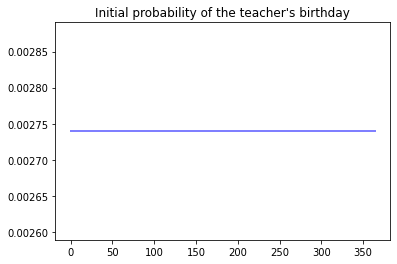

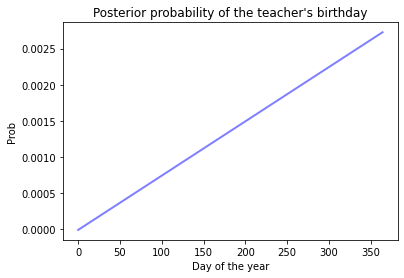

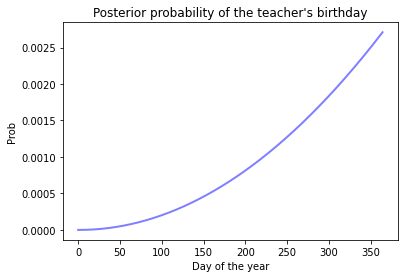

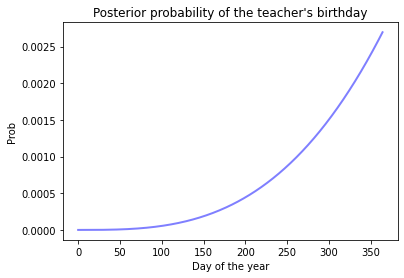

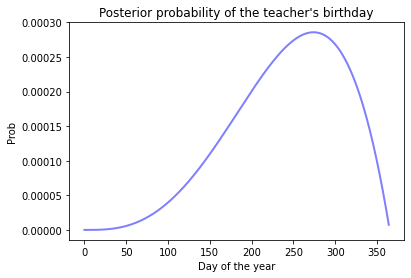

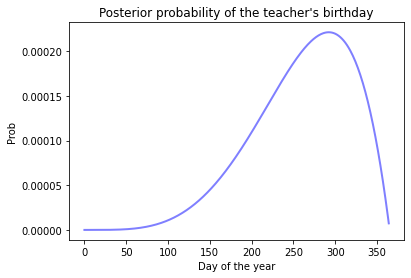

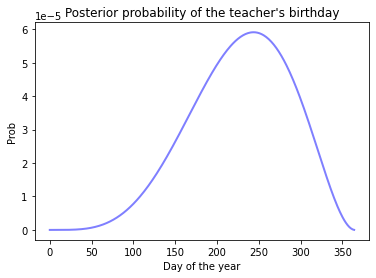

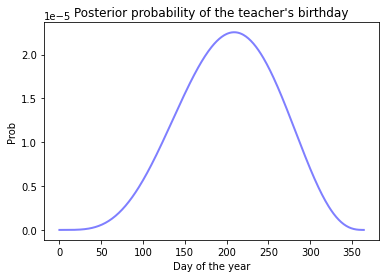

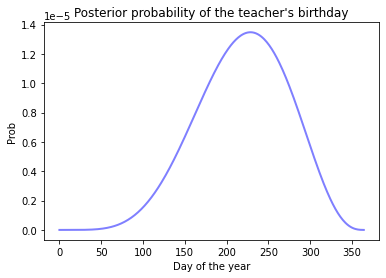

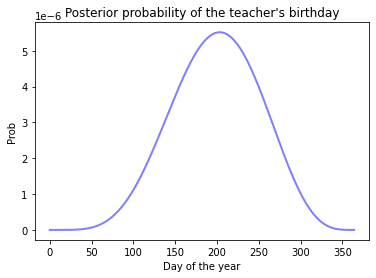

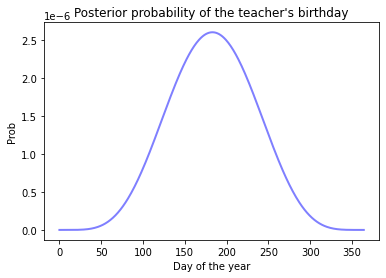

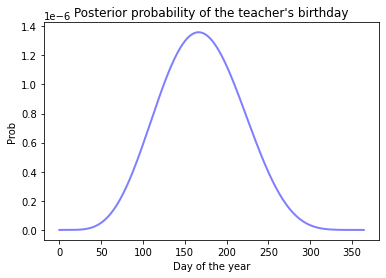

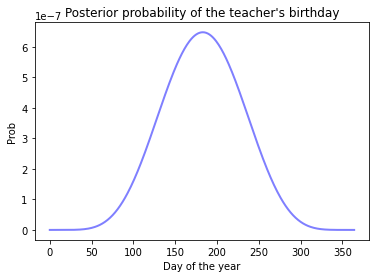

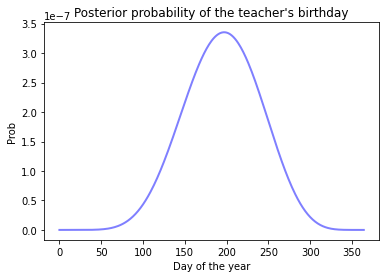

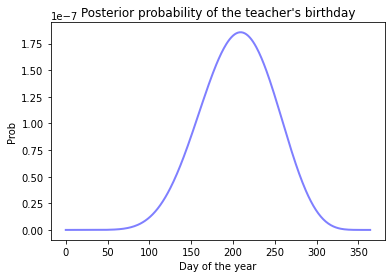

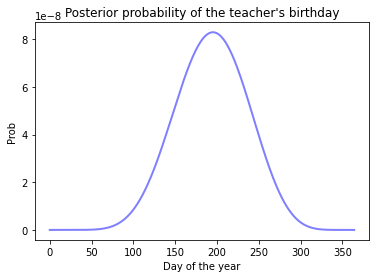

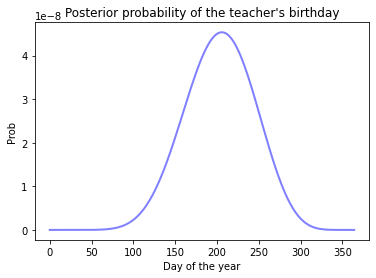

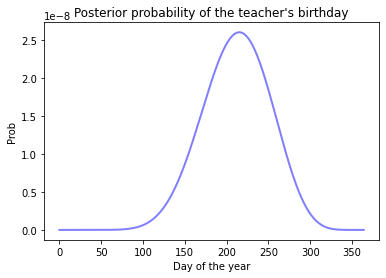

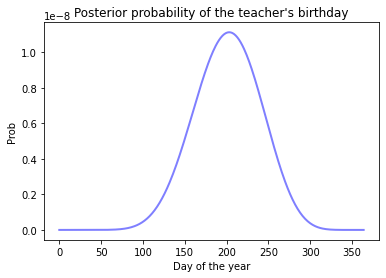

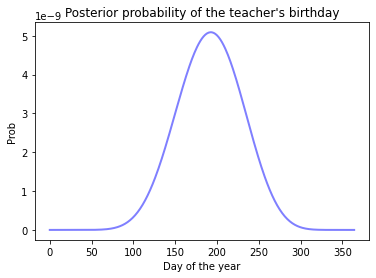

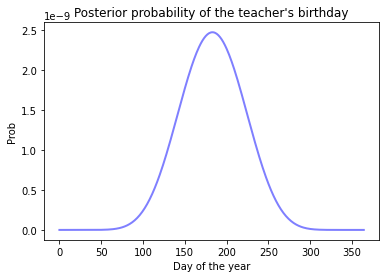

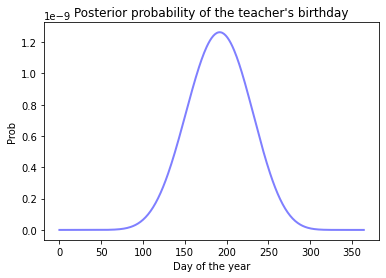

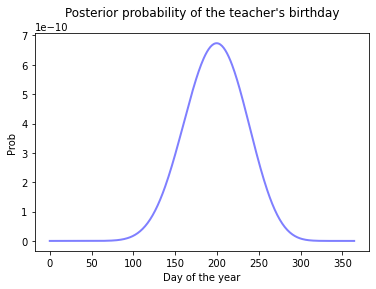

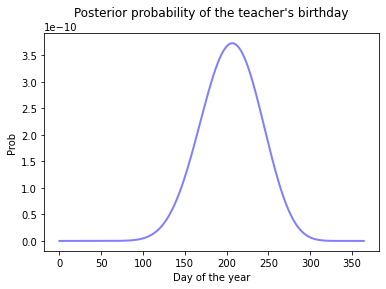

In [ ]:
prior = np.ones(365)/365

posterior = [1 for i in range(0,365)]

plt.plot(range(0,365),prior, color = 'b', linewidth='2', alpha=0.5)
plt.title("Initial probability of the teacher\'s birthday")
plt.show()

for i in range(0, len(observations)):
    plt.plot(range(0,365), posterior_probability(prior, observations[i]), color = 'b', linewidth='2', alpha=0.5)
    plt.xlabel("Day of the year")
    plt.ylabel("Prob")
    plt.title("Posterior probability of the teacher\'s birthday")
    plt.show()

 Notice how initially the distribution gets skewed to the right due to observing $\text{L}$'s in a row and then starts readjusting as more observations  are sampled.

In [ ]:
def prepare_animation(ax, observations, priors):
  def animate(frame):
    ax.clear()
    if frame == 0:
      plot = ax.plot(range(0,365),np.ones(365)/365, color = 'b', linewidth='2', alpha=0.5)

      ax.set_xlabel('Day of the year')
      ax.set_ylabel('Prob')
      ax.set_title('Posterior probability of the teacher\'s birthday after no observations')
    else:
      plot = ax.plot(range(0,365), posterior_probability(priors, observations[frame]), color = 'b', linewidth='2', alpha=0.5)

      ax.axvline(x=np.argmax(posterior_probability(priors, observations[frame])), color = 'b', linestyle = '--', linewidth='1', alpha=0.4)
      ax.set_xlabel('Day of the year')
      ax.set_ylabel('Prob')
      ax.set_title('Posterior probability of the teacher\'s birthday')

    return plot
  return animate

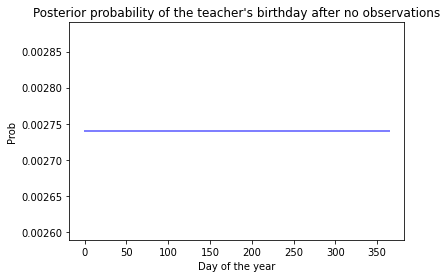

In [ ]:
priors = np.ones(365)/365
posteriors = [1 for i in range(0,365)]

frames = len(observations) #23 frames in our example

fig, ax = plt.subplots()
#plt.show()
animate = prepare_animation(ax, observations, priors)
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=200, repeat=True)
anim